# Music Diversity Over the years

## Team: Data Tots

# Credits:
### - Hannah Ark - Report Write-Up, data collection, brainstorming/planning
### - Caleb Huck - Report Write-Up, data collection, brainstorming/planning
### - John Lutz - Brainstorming/planning, data collection, visualization
### - Raphael Esedebe - Brainstorming/planning, data collection, visualization
### - Nazar Taxitiemuer - created GitHub
# Major changes:
The team decided that it would be best to change our research topic from Part 1 to one that focuses on answering questions about the globalization of music. We made this decision because we felt that our initial topic was not clear and did not have as much of a real world application as our new one. Our new research topic aims to visualize the rise of music from different areas of the world in Spotify's top hits playlists from 2008 to 2021.


# Question
There is no doubt that over the years, music's top hits have become more diversified. Songs by artists from all over the world have entered the mainstream music world; we no longer exclusively listen to music from Northern America (or more generally, the West). The purpose of our research is to visualize the popularity of music from different continents in the Top Hits playlists created by Spotify from the years 2008 to 2021. We chose to analyze Spotify because it's considered the top music streaming service

To start, we collected Top Hits playlists made by Spotify for the specified years. We chose to use playlists by Spotify specifically because we felt that the data used to create those playlists were more reliable than if we were to use personal playlists by Spotify users. Each playlist is a collection of songs that had top streaming numbers for that year. We also defined continents as categories to analyze different parts of the world. One continent that is not included in this analysis is Antarctica, as it is not highly populated and therefore does not have sufficient music data to include in the research. We also did not include North America yet, as it is hard to pin down genres that include exclusively American music. In order to categorize songs, we had to first organize genres into categories based on regions that they're from. For example, K-Pop would be categorized under the continent of Asia. We then identified artists in the playlists, checked to see what genre they fell under (which in turn gave us what continent they fell under), and then plotted each continent on a graph for visualization.

Although this topic focuses on the broad idea of the spread of music from different cultures, we also can expand our research to see how different types of music compare to each other as well. We can delve into other questions such as During which years did music from Asia gain popularity? or What continent produced the most hits in the past five years? and related topics.


#Analysis

In [1]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [2]:
cid = 'accc4df73a694fabbce2979c05a8bf40'
secret = 'dbc8258de4a34382b6e51e2c99d30527'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=cid, client_secret=secret))

In [3]:
top_2021_url = 'https://open.spotify.com/playlist/37i9dQZF1DX18jTM2l2fJY?si=8b783d32e1b94960'
top_2020_url = 'https://open.spotify.com/playlist/37i9dQZF1DX7Jl5KP2eZaS?si=0faff1f0fc9d4ee2'
top_2019_url = 'https://open.spotify.com/playlist/37i9dQZF1DWVRSukIED0e9?si=381011c3547342de'
top_2018_url = 'https://open.spotify.com/playlist/37i9dQZF1DXe2bobNYDtW8?si=9048770b740f4e3b'
top_2017_url = 'https://open.spotify.com/playlist/37i9dQZF1DWTE7dVUebpUW?si=c495c49a26b246a7'
last_5_urls = [top_2021_url, top_2020_url, top_2019_url, top_2018_url, top_2017_url]

latin_genres = ['reggaeton', 'trap latino','puerto rican pop','colombian pop',
                'latin hip hop','reggaeton flow','reggaeton colombiano','latin pop', 'pop argentino']

names = []
inv_genre = []
pop = []
years = []
songs = []

counter = 0
year = 2021

# Going through all urls 
for url in last_5_urls:

    # using spotify private web scraper
    results = spotify.playlist(url)

    # iterating through each song
    for item in results['tracks']['items']:

        # finding the top 50 songs of each year
        if (counter < 50):
            counter += 1

            # iterating through the artist(s) on each song
            for artist in item['track']['artists']:

                # finding data on the artist using spotify web scraper
                artist_uri = artist['uri']
                artist_data = spotify.artist(artist_uri)

                # finding the genre of the artist
                helper = [genre for genre in artist_data['genres'] if genre in latin_genres]
                if (len(helper) > 0):

                    # appending to data frame
                    names.append(artist_data['name'])
                    inv_genre.append(helper[0])
                    pop.append(artist_data['popularity'])
                    years.append(year)
                    songs.append(item['track']['name'])
    counter = 0
    year -= 1
        
# These lengths should all be the same
print(len(names))
print(len(inv_genre))
print(len(pop))
print(len(years))


41
41
41
41


In [4]:
latin_df = pd.DataFrame({'Artist Name': names, 'Track': songs,'Main Genre': inv_genre, 
                         'Popularity': pop, 'Year in Top 50': years})
#latin_df

In [5]:
new_df = latin_df.groupby(['Track', 'Year in Top 50']).size().reset_index()
new_df = new_df.drop(columns=['Track']).groupby('Year in Top 50').size().reset_index()
new_df = new_df.rename(columns={0:"Number of Latin Songs", 'Year in Top 50': 'Top 50 Tracks of the Year' }).set_index('Top 50 Tracks of the Year')
#new_df

<AxesSubplot:xlabel='Top 50 Tracks of the Year'>

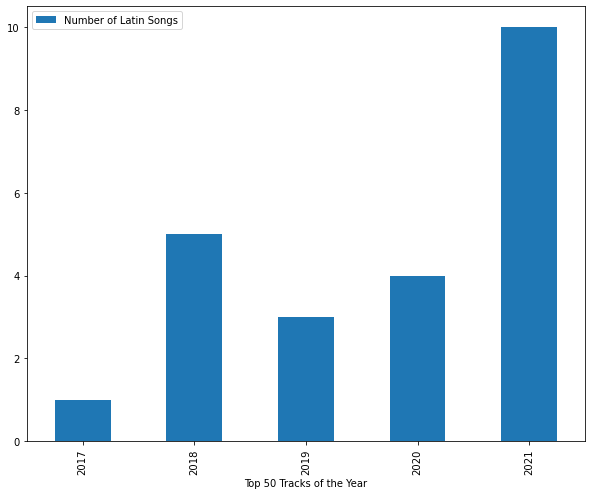

In [6]:
new_df.plot.bar(figsize=(10,8))

# Conclusion:
Because of the rise in popularity of Latin music (as we saw in the visualization), we can infer that the other music categories also exhibit an increase in streaming numbers as time progresses. Unfortunately, we were unable to create a full visualization, as the source of our data was rate limiting us and we were unable to run our program after a certain amount of times. Before the next iteration of this project, we hope to find either a different way to approach this issue using the same source, or finding a completely new source of data. This decision will be made after consultation with a TA or the professor. When all data is successfully organized, we hope to solidify the concept of music globalization over time.
## Some uncertainties faced in this research include: 
- We are unsure if all genres of music are available for a given country/geographic area.
- We do not know what may have caused any noticeable spikes and/or dips of a music type during a certain time.
## Some limitations for this research are: 
- When searching through genres to pin down a song's category, we only look at genres that are listed in Spotify. We do not have access to any genres that may exist in the region that are not considered in Spotify.
- Not all regions being analyzed have the same genres available.
- We cannot account for any biases created from marketing strategies that may focus on making certain genres more popular than others.
## Biases:
- We must recognize that Spotify content is most likely highly tailored to American audiences.
- Genres in Spotify that are more general (Pop, Hip-Hop, etc.) are assumed to be American (Northern America), even though it could include songs from different continents.
## Caveats:
- Since it is hard to pin down what genres are considered in the Northern American category, we are only able to look at data outside of the region.
- Successful years for music industry in America may overshadow the rising interest of music from other regions.
## New problems:
- Do trends of rise in a base genre also trickle down into a rise of regional variants of that genre? I.e. would the rise of Rock music also show a similar rise of German rock or African rock?
